In [1]:
import sys, threading
import numpy as np
import random
import time
import matplotlib.pyplot as plt
sys.setrecursionlimit(10 ** 7)
threading.stack_size(2 ** 27)

0

In [2]:
def GCD(a, b):
    if b == 0:
        return a
    return GCD(b, a % b)

def extendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = extendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

def modularExponentiate(a, n, mod):
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = modularExponentiate(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
            return b
        else:
            return b * a % mod

def modularInverse(a, n):
    (b, x) = extendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n  # we don't want -ve integers
    return b

#TODO: change the implementation
#look up ways to change strings to ints for encryption
def ConvertToInt(message_str):  
    res = 0
    for i in range(len(message_str)):
        res = res * 256 + ord(message_str[i])
    return res

#TODO: change the implementation
#look up ways to change strings to ints for encryption
def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

def Encrypt(m, e, n):
    m = ConvertToInt(m)
    c = modularExponentiate(m,e,n)
    return c

def getPrivateKey(e,p,q):
    phi_n = (p - 1) * (q - 1)
    d = modularInverse(e, phi_n)
    return d

def Decrypt(c, d, p, q):
    m = modularExponentiate(c, d, p * q)
    m = ConvertToStr(m)
    return m

In [3]:
#simple test
p = 1000000007
q = 1000000009
exponent = 23917
modulo = p * q
ciphertext = Encrypt("attack", exponent, modulo)
d = getPrivateKey(exponent,p,q)
message = Decrypt(ciphertext, d, p, q)
print(message)

attack


In [4]:
"""
Parameter generation
on sign up generate large numbers of preferably 512 bits to be used as p and q
then generate random e such that gcd(e,phi(n)) = 1
e can be generated using nBitRandom then checking using GCD that the result is 1
d is the modular inverse of e mod(phi(n))
"""

#generating p and q
#https://www.geeksforgeeks.org/how-to-generate-large-prime-numbers-for-rsa-algorithm/
def nBitRandom(n):
    # Returns a random number of n bits
    return(random.randrange(2**(n-1)+1, 2**n-1))

def fermatPrimalityTest(p):
    """
    a:random integer
    p:the number to test if prime or not
    """
    for i in range(1,102):
        a=np.random.randint(1,p)
        aPowP = modularExponentiate(a,p,p)
        if (aPowP - a) % p != 0: return False
    return True

In [8]:
"""
Brute force attack
you need to factorize large n into 2 prime factors
factorization of n is unique, once you find 2 primes ur done

"""
# brute force attack
def bruteForceAttack(n):
    for i in range(2,n):
        if n % i == 0:
            return i

In [9]:
# Generate prime numbers less than N
def generatePrimeNumbers(N):
    # Returns a list of prime numbers less than N
    primeNumbers = []
    for i in range(2, N):
        if fermatPrimalityTest(i):  # Fermat's primality test
            primeNumbers.append(i)
    return primeNumbers


In [28]:
def testBruteForceTime(N):
    time_taken = []
    n_values =[]
    # Test the time it takes to brute force attack
    primeNumbers = generatePrimeNumbers(N) # Generate prime numbers less than N
    for i in range(len(primeNumbers)):
        for j in range(i+1, len(primeNumbers)):
            n_val =primeNumbers[i]*primeNumbers[j] # n = p*q
            n_values.append(n_val)
            start_time = time.time()
            bruteForceAttack(n_val) # Brute force attack
            end_time = time.time()
            time_taken.append(end_time - start_time) # Time taken to brute force attack
    return time_taken , n_values

In [29]:
time_vals , n_vals = testBruteForceTime(10000)

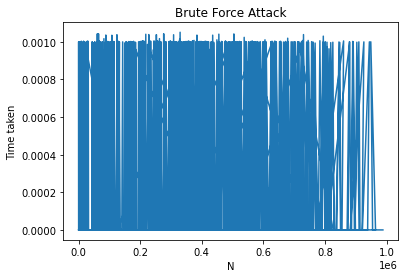

In [40]:
plt.plot(n_vals, time_vals)
plt.xlabel('N')
plt.ylabel('Time taken')
plt.title('Brute Force Attack')
plt.show()